In [3]:
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from hipe4ml.model_handler import ModelHandler
from hipe4ml.tree_handler import TreeHandler
from hipe4ml.analysis_utils import train_test_generator
from hipe4ml import plot_utils, analysis_utils
from utils.hist_utils import *

In [2]:
# import uproot

In [3]:
# def hist_to_df(hist):
#     """
#     Convert a TH1 or TH2 histogram to a pandas DataFrame.
#     """
#     if hist.classname.startswith("TH1"):
#         values, edges = hist.to_numpy()
#         # x_axis = hist.axis()
#         x_label = hist.name or "x"  # use axis label if available
#         return pd.DataFrame({
#             x_label + "_left": edges[:-1],
#             x_label + "_right": edges[1:],
#             "counts": values
#         })
#     elif hist.classname.startswith("TH2"):
#         values, (xedges, yedges) = hist.to_numpy()
#         x_label = hist.name or "x"
#         y_label = hist.name or "y"
#         X, Y = np.meshgrid(xedges[:-1], yedges[:-1], indexing="ij")
#         return pd.DataFrame({
#             x_label: X.ravel(),
#             y_label: Y.ravel(),
#             "counts": values.ravel()
#         })
#     else:
#         raise NotImplementedError("Only TH1 and TH2 supported")
    
# def rebin_df(df, new_edges, x_left="x_left", x_right="x_right", counts="counts"):
#     new_counts = []
    
#     for i in range(len(new_edges)-1):
#         bin_left = new_edges[i]
#         bin_right = new_edges[i+1]
#         # Select all original bins that overlap the new bin
#         mask = (df[x_right] > bin_left) & (df[x_left] < bin_right)
        
#         # Sum the counts of overlapping bins (simple sum; more precise weighting can be applied if needed)
#         new_counts.append(df.loc[mask, counts].sum())
        
#     return pd.DataFrame({
#         "bin_left": new_edges[:-1],
#         "bin_right": new_edges[1:],
#         "counts": new_counts
#     })

# import os
# import ROOT

# # def df_to_root_th1(df, hist_name="hist", hist_title="Histogram"):
# #     """
# #     Convert a pandas DataFrame with 'bin_left', 'bin_right', 'counts' to a TH1
# #     """

# #     bin_edges = np.append(df["bin_left"].values, df["bin_right"].values[-1])
# #     counts = df["counts"].values
# #     nBins = len(counts)
# #     hist = ROOT.TH1F(hist_name, hist_title, nBins, bin_edges)
# #     for i, c in enumerate(counts):
# #         hist.SetBinContent(i+1, c)  # ROOT bins start at 1
# #     return hist


# def df_to_root_graph(df, graph_name="graph", graph_title="Histogram with errors"):
#     """
#     Convert a pandas DataFrame with 'bin_left', 'bin_right', 'counts' to a ROOT TGraphErrors
#     with horizontal error bars corresponding to bin widths.
#     """
#     bin_left = df["bin_left"].values
#     bin_right = df["bin_right"].values
#     counts = df["counts"].values

#     x = (bin_left + bin_right) / 2.0           # bin centers
#     y = counts
#     ex = (bin_right - bin_left) / 2.0          # horizontal errors = half bin width
#     # ey = np.sqrt(counts)                        # vertical errors (Poisson), can set to 0 if not needed
#     ey=np.zeros_like(y)  # No vertical errors, can be set to zero
#     graph = ROOT.TGraphErrors(len(x),
#                               x.astype(float), y.astype(float),
#                               ex.astype(float), ey.astype(float))
#     graph.SetName(graph_name)
#     graph.SetTitle(graph_title)
#     graph.SetMarkerStyle(20)
#     # graph.SetMarkerSize(0.8)

#     return graph

# # LEGEND_SIZE_DEFAULT = 0.02
# # LEGEND_COORDS_DEFAULT = [0.2, 0.6, 0.4, 0.9]
# # def createLegend(legLines, legCoords=LEGEND_COORDS_DEFAULT, textSize=LEGEND_SIZE_DEFAULT, isMC=False):
# #     legend = TLegend(*legCoords)
# #     legend.SetFillStyle(0)
# #     legend.SetBorderSize(0)
# #     legend.SetTextSize(textSize)
# #     for legLine in legLines:
# #         legend.AddEntry(legend, legLine, "")
# #     legend.AddEntry(legend, "Data, |y| < 0.9", "")
# #     if isMC:
# #         legend.AddEntry(legend, "MC, |y| < 0.9", "")
# #     return legend

In [4]:
# dir = '~/alice/O2Physics/PWGJE/Tasks/JPsiWorkDir/JPsiMC/DQEfficiency'
# filename = 'AnalysisResults_MCSignals25-08-25.root'
# path = f"{dir}/{filename}"
# with uproot.open(path) as root_file:
#     print(root_file.keys())
#     # analysis_dir = root_file['analysis-same-event-pairing']
# # print(analysis_dir.keys()) 
#     output_dir = root_file['analysis-same-event-pairing/output;1']

In [5]:
# for JPsiList in output_dir:
#     print("JPsiList: ", JPsiList.member("fName"))
#     if JPsiList.member("fName") == "MCTruthGen_promptJpsi":
#         genPJPsiList = JPsiList
#     elif JPsiList.member("fName") == "PairsBarrelSEPM_jpsiO2MCdebugCuts14":
#         recoPJPsiList = JPsiList

In [6]:
# print("genPJPsiList hists:",)
# for hist in genPJPsiList:
#     print(hist.member("fName"))
#     if hist.member("fName") == "PtMC":
#         genPJPsiptDf = hist_to_df(hist)


# print("\nrecoPJPsiList hists:",)
# for hist in recoPJPsiList:
#     print(hist.member("fName"))
#     if hist.member("fName") == "Pt":
#         recoPJPsiptDf = hist_to_df(hist)

In [7]:
# print("genPJPsiptDf: ")
# genPJPsiptDf

In [8]:
# print("recoPJPsiptDf: ")
# recoPJPsiptDf

In [9]:
# ptBins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 12]  # De

# genPJPsiptDfReb = rebin_df(genPJPsiptDf, ptBins, x_left="PtMC_left", x_right="PtMC_right", counts="counts")
# recoPJPsiptDfReb = rebin_df(recoPJPsiptDf, ptBins, x_left="Pt_left", x_right="Pt_right", counts="counts")

In [10]:
# print("genPJPsiptDfReb: ")
# genPJPsiptDfReb

In [11]:
# print("recoPJPsiptDfReb: ")
# recoPJPsiptDfReb

In [12]:
# df_eff = recoPJPsiptDfReb.copy()
# df_eff['counts'] = df_eff['counts'] / genPJPsiptDfReb['counts']
# df_eff

In [13]:
# %jsroot on
# eff_hist = df_to_root_th1(df_eff,
#                hist_name="efficiency_hist",
#                hist_title="Efficiency Histogram")

# c = ROOT.TCanvas()
# # eff_hist.SetLineColor(ROOT.kBlue-2)  
# eff_hist.GetXaxis().SetTitle("p_{T} (GeV/c)")
# eff_hist.GetYaxis().SetTitle("Efficiency")
# eff_hist.SetMarkerStyle(20)
# # eff_hist.SetMarkerSize(0.5)
# eff_hist.SetMarkerColor(ROOT.kBlue-2)


# eff_hist.Draw("P")

# legend = ROOT.TLegend(0.7, 0.7, 0.9, 0.9)
# legend.AddEntry(eff_hist, "Efficiency")
# legend.Draw()

# c.Draw()

# Save to ROOT file
# root_file = ROOT.TFile("Efficiency.root", "RECREATE")
# hist.Write()
# root_file.Close()

In [14]:
# graph = df_to_root_graph(df_eff, graph_name="efficiency_graph", graph_title="Efficiency vs pT")
# c = ROOT.TCanvas()
# graph.Draw("AP")  # A = axis, P = points with error bars
# graph.GetXaxis().SetTitle("p_{T} (GeV/c)")
# graph.GetYaxis().SetTitle("A x #epsilon")
# graph.SetMarkerColor(ROOT.kRed-2)
# graph.SetLineColor(ROOT.kRed-2)
# graph.SetLineWidth(2)

# legend = ROOT.TLegend(0.7, 0.7, 0.9, 0.9)
# legend.AddEntry(legend,"pp #sqrt s = 13.6 TeV", "")
# legend.AddEntry(graph, "Efficiency", "p")
# # legend.AddEntry(graph2, "Dataset 2", "p")
# legend.SetFillStyle(0)
# legend.SetBorderSize(0)
# legend.SetTextSize(0.04)
# legend.Draw()

# c.Draw()

In [15]:
# recoFile = "~/alice/O2Physics/PWGJE/Tasks/JPsiWorkDir/JPsiMC/DQEfficiency/AnalysisResults_trees.root"
# genFile = "~/alice/JPsiDatasets/MC/RawMC/AO2DMC_LHC25b16_0_550369_AOD_001.root"

# f_reco = uproot.open(recoFile)
# f_gen = uproot.open(genFile)

# dfs = [] # Needed if the root files contain multiple TDirectoryFiles (representing dataframes) with TTrees

# for key in f_reco.keys():
#     name = key.decode() if isinstance(key, bytes) else key  # ROOT 6.x returns bytes
#     if name.startswith("DF"):
#         print(f"Processing directory: {name}")
#         tree_path = f"{name}/O2rtdielectron" # Without ";1"
#         try:
#             th = TreeHandler(recoFile, tree_name=tree_path) # Returns a pd.DataFrame()
#             dfs.append(th.data)
#         except Exception as e:
#             print(f"  Could not load {tree_path}: {e}")

# # Concatenar todos os DataFrames
# full_data = pd.concat(dfs, ignore_index=True)
# print("Total entries:", len(full_data))

# # Exemplo: aplicar cut de massa e calcular eficiência global
# mask = (full_data['mass'] > 3.0) & (full_data['mass'] < 3.2)
# n_total = len(full_data)
# n_pass  = mask.sum()
# efficiency = n_pass / n_total
# print("Global efficiency:", efficiency)

In [5]:
dataH = TreeHandler("~/alice/EfficiencyAndML/output_jpsiYuanjing.root",'O2rtdielectronall')
# =3 is prompt jpsi and =5 is nonprpmpt jpsi
promptH = dataH.get_subset('fMcDecision==3')
nonpromptH = dataH.get_subset('fMcDecision==5')
# Ferrandi: mcDecision is decided from the order of cfgBarrelMCRecSignals passed to dqEfficiency, excluding 0 (I think)

In [6]:
dataHtest = TreeHandler("~/Downloads/AO2DdqEffWagonTestJpsi2ee.root", "O2rtdielectronall", folder_name="DF*")
dataHtest         

Reading ~/Downloads/AO2DdqEffWagonTestJpsi2ee.root:DF_2317775231652003/O2rtdielectronall;1
Reading ~/Downloads/AO2DdqEffWagonTestJpsi2ee.root:DF_2317775231652035/O2rtdielectronall;1
Reading ~/Downloads/AO2DdqEffWagonTestJpsi2ee.root:DF_2317775231652067/O2rtdielectronall;1
Reading ~/Downloads/AO2DdqEffWagonTestJpsi2ee.root:DF_2317775231652099/O2rtdielectronall;1
Reading ~/Downloads/AO2DdqEffWagonTestJpsi2ee.root:DF_2317775231652131/O2rtdielectronall;1
Reading ~/Downloads/AO2DdqEffWagonTestJpsi2ee.root:DF_2317775281829603/O2rtdielectronall;1
Reading ~/Downloads/AO2DdqEffWagonTestJpsi2ee.root:DF_2317775281829635/O2rtdielectronall;1
Reading ~/Downloads/AO2DdqEffWagonTestJpsi2ee.root:DF_2317775281829667/O2rtdielectronall;1
Reading ~/Downloads/AO2DdqEffWagonTestJpsi2ee.root:DF_2317775281829699/O2rtdielectronall;1
Reading ~/Downloads/AO2DdqEffWagonTestJpsi2ee.root:DF_2317775281829731/O2rtdielectronall;1
Reading ~/Downloads/AO2DdqEffWagonTestJpsi2ee.root:DF_2317775295270083/O2rtdielectronall;1

In [7]:
promptHtest.get_var_names()

NameError: name 'promptHtest' is not defined

In [8]:
def plot_distr2(data_list, column=None, bins=50, labels=None, colors=None, **kwds):  # pylint: disable=too-many-branches
    """
    Draw histograms comparing the distributions of each class.

    Parameters
    -----------------------------------------
    data_list: TreeHandler, pandas.Dataframe or list of them
        Contains a TreeHandler or a dataframe for each class

    column: str or list of them
        Contains the name of the features you want to plot
        Example: ['dEdx', 'pT', 'ct']. If None all the features
        are selected

    bins: int or sequence of scalars or str
        If bins is an int, it defines the number of equal-width
        bins in the given range (10, by default). If bins is a
        sequence, it defines a monotonically increasing array of
        bin edges, including the rightmost edge, allowing for
        non-uniform bin widths.

    labels: str or list of them
        Contains the labels to be displayed in the legend
        If None the labels are class1, class2, ..., classN

    colors: str or list of them
        List of the colors to be used to fill the histograms

    **kwds:
        extra arguments are passed on to pandas.DataFrame.hist():
        https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html

    Returns
    -----------------------------------------
    out: numpy array of matplotlib.axes.AxesSubplot
        Distributions of the features for each class
    """
    list_of_df = []
    if not isinstance(data_list, list):
        data_list = [data_list]
        labels = [labels]
        colors = [colors]
    if isinstance(data_list[0], hipe4ml.tree_handler.TreeHandler):
        for handl in data_list:
            list_of_df.append(handl.get_data_frame())
    else:
        list_of_df = data_list

    if column is not None:
        if not isinstance(column, (list, np.ndarray, pd.Index)):
            column = [column]

    else:
        column = list(list_of_df[0].columns)

    if labels is None:
        labels = [f'class{i_class}' for i_class, _ in enumerate(list_of_df)]

    if colors is None:
        colors = [None for i_class, _ in enumerate(list_of_df)]

    for i_class, (dfm, lab, col) in enumerate(zip(list_of_df, labels, colors)):
        if i_class == 0:
            axes = dfm.hist(column=column, bins=bins, label=lab, color=col, **kwds)
            axes = axes.flatten()
            axes = axes[:len(column)]
        else:
            dfm.hist(ax=axes, column=column, bins=bins, label=lab, color=col, **kwds)
    for axs in axes:
        axs.set_ylabel('Counts')
    axes[-1].legend(loc='best')
    if len(axes) == 1:
        axes = axes[0]
    return axes

In [9]:
noneHtest = dataHtest.get_subset('fMcDecision==0')
promptHtest = dataHtest.get_subset('fMcDecision==1')
nonpromptHtest = dataHtest.get_subset('fMcDecision==2')
vars_to_drawtest = promptHtest.get_var_names()
# print(len(vars_to_drawtest))
# print(vars_to_drawtest[0:2])
# print(vars_to_drawtest[2:4])
# vars_to_drawtest = ['fMass',
#  'fPt',
#  'fEta',
#  'fPhi',
#  'fSign',
#  'fFilterMap',
#  'fMcDecision',]
leg_labelstest = ['no MCSignal', r'Non-p J/$\psi$', r'Prompt J/$\psi$']
plt.rcParams["figure.figsize"] = (10, 7)
plt.rcParams["legend.fontsize"] = 5
plt.rcParams['axes.titlesize'] = 9
plt.rcParams['axes.labelsize'] = 7 # size of 'counts' label
plt.rcParams['xtick.labelsize'] = 6
plt.rcParams['ytick.labelsize'] = 6
# plt.rcParams['y]
plt.rcParams['savefig.format'] = 'pdf'

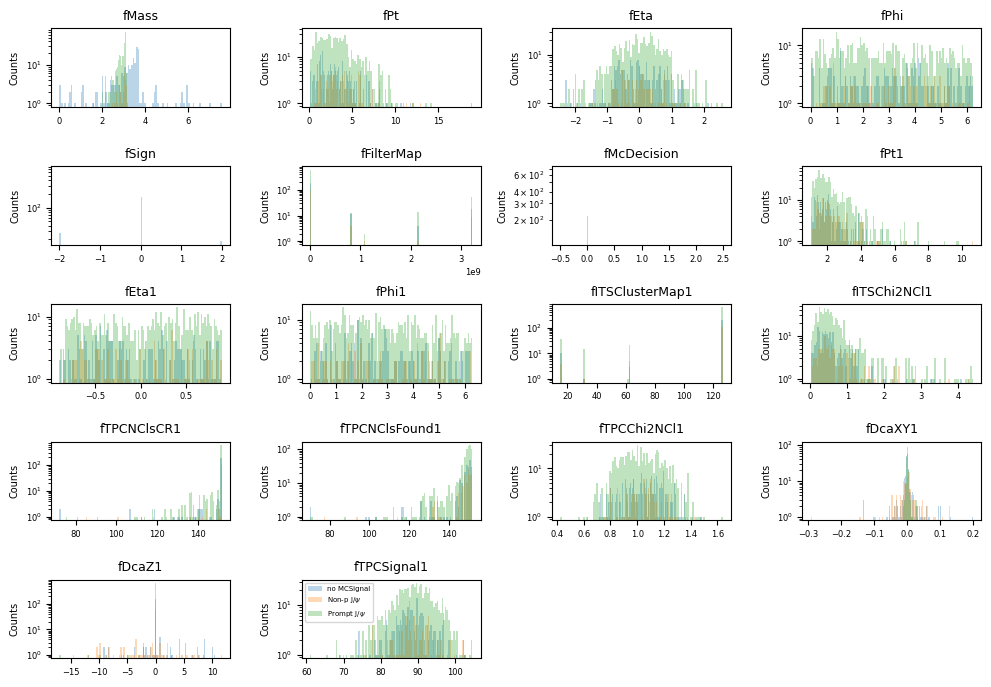

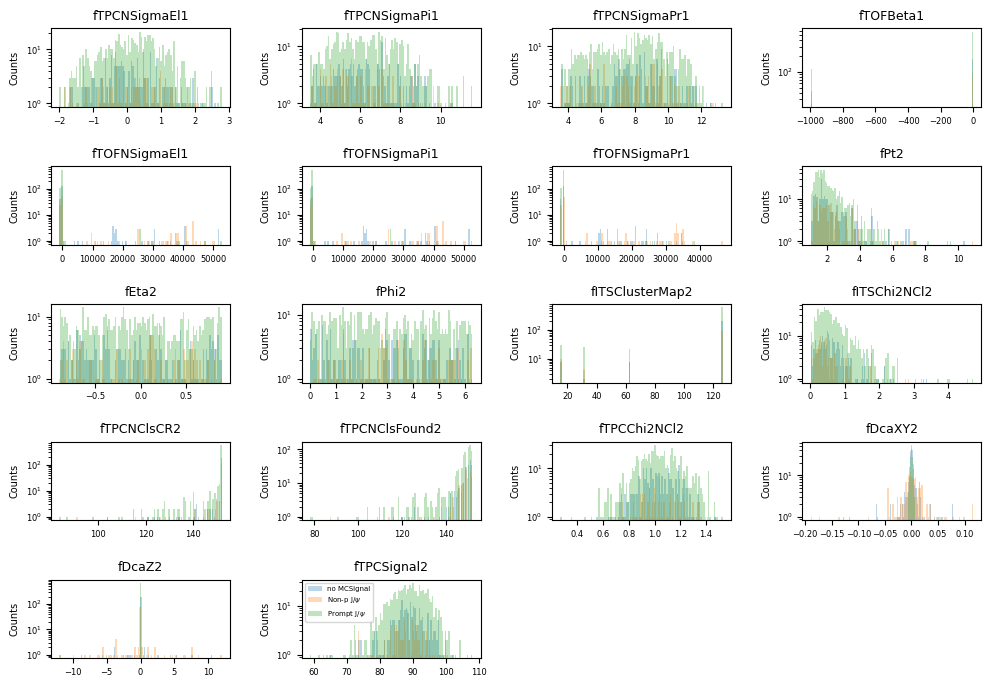

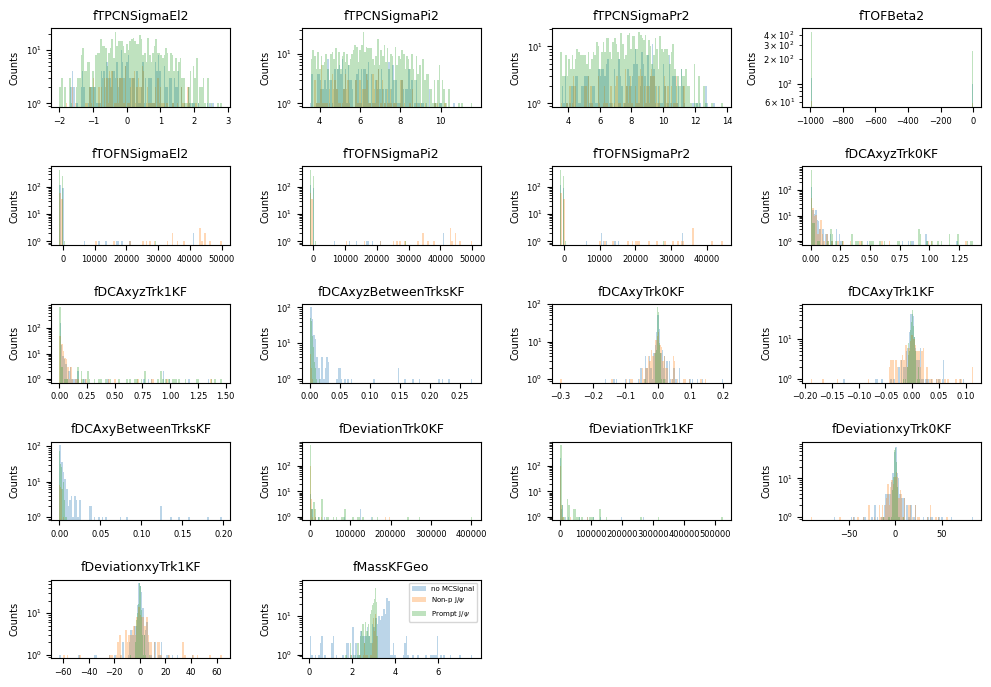

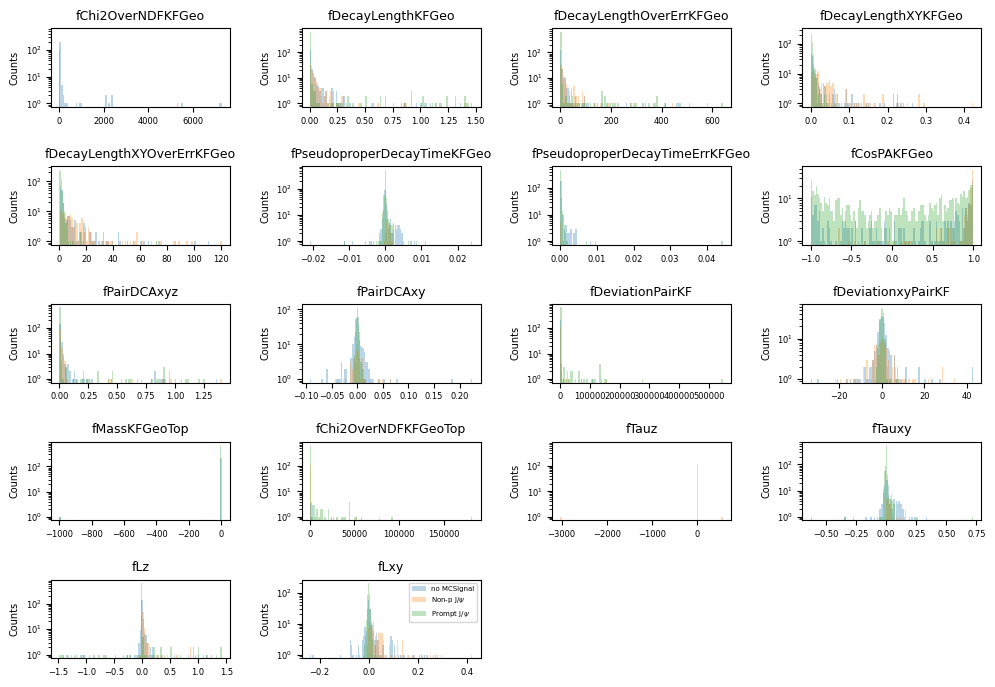

In [10]:
# plt.legend()#loc='lower right')
axes1 = plot_utils.plot_distr([noneHtest, nonpromptHtest, promptHtest], vars_to_drawtest[0:18], bins=100, labels=leg_labelstest, log=True, density=False, alpha=0.3, grid=False)
plt.subplots_adjust(left=0.06, bottom=0.06, right=0.99, top=0.96, hspace=0.75, wspace=0.4)
plt.savefig('OutputAO2DdqEffWagonTestJpsi2ee/VarDistr1.pdf')
axes2 = plot_utils.plot_distr([noneHtest, nonpromptHtest, promptHtest], vars_to_drawtest[18:36], bins=100, labels=leg_labelstest, log=True, density=False, alpha=0.3, grid=False)
plt.subplots_adjust(left=0.06, bottom=0.06, right=0.99, top=0.96, hspace=0.75, wspace=0.4)
plt.savefig('OutputAO2DdqEffWagonTestJpsi2ee/VarDistr2.pdf')
axes3 = plot_utils.plot_distr([noneHtest, nonpromptHtest, promptHtest], vars_to_drawtest[36:54], bins=100, labels=leg_labelstest, log=True, density=False, alpha=0.3, grid=False)
plt.subplots_adjust(left=0.06, bottom=0.06, right=0.99, top=0.96, hspace=0.75, wspace=0.4)
plt.savefig('OutputAO2DdqEffWagonTestJpsi2ee/VarDistr3.pdf')
axes4 = plot_utils.plot_distr([noneHtest, nonpromptHtest, promptHtest], vars_to_drawtest[54:], bins=100, labels=leg_labelstest, log=True, density=False, alpha=0.3, grid=False)
plt.subplots_adjust(left=0.06, bottom=0.06, right=0.99, top=0.96, hspace=0.75, wspace=0.4)
plt.savefig('OutputAO2DdqEffWagonTestJpsi2ee/VarDistr4.pdf')

In [11]:
# vars_to_drawDCA = vars_to_drawtest[np.char.find(np.char.lower(vars_to_drawtest), "dca") >= 0]

dca_vars = [var for var in vars_to_drawtest if "dca" in var.lower()]
print(dca_vars)

['fDcaXY1', 'fDcaZ1', 'fDcaXY2', 'fDcaZ2', 'fDCAxyzTrk0KF', 'fDCAxyzTrk1KF', 'fDCAxyzBetweenTrksKF', 'fDCAxyTrk0KF', 'fDCAxyTrk1KF', 'fDCAxyBetweenTrksKF', 'fPairDCAxyz', 'fPairDCAxy']


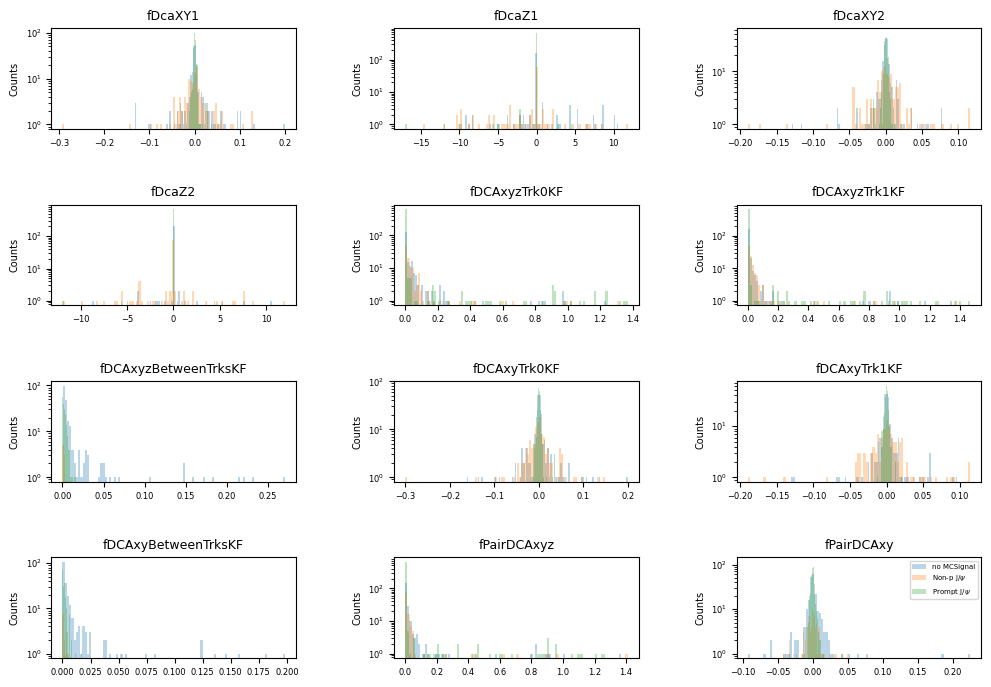

In [12]:
axes1 = plot_utils.plot_distr([noneHtest, nonpromptHtest, promptHtest], dca_vars, bins=100, labels=leg_labelstest, log=True, density=False, alpha=0.3, grid=False)
plt.subplots_adjust(left=0.06, bottom=0.06, right=0.99, top=0.96, hspace=0.75, wspace=0.4)
plt.savefig('OutputAO2DdqEffWagonTestJpsi2ee/DCAdists.pdf')

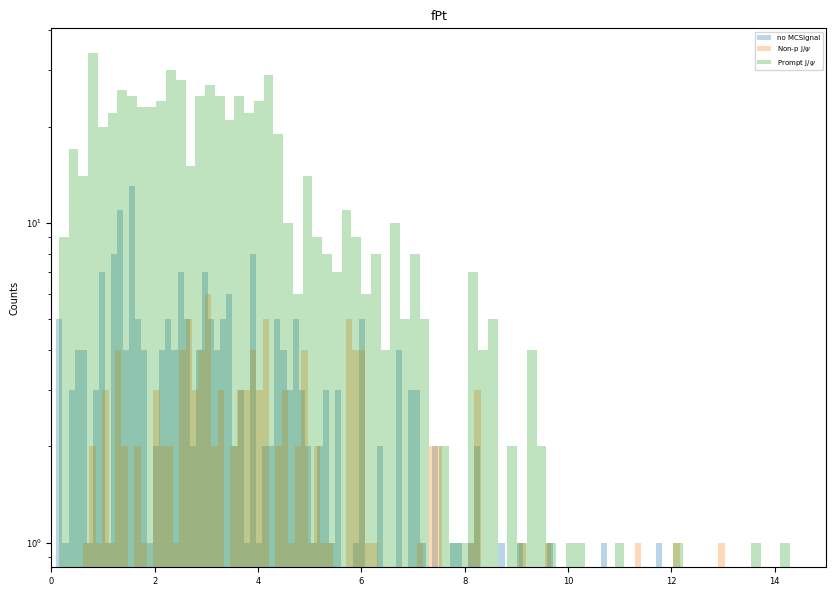

In [ ]:
axes1 = plot_utils.plot_distr([noneHtest, nonpromptHtest, promptHtest], "fPt", bins=100, labels=leg_labelstest, log=True, density=False, alpha=0.3, grid=False)
axes1.set_xbound(0,15)

In [22]:
train_test_data = train_test_generator([promptH, nonpromptH], [1,0], test_size=0.5, random_state=42)

In [23]:
vars_to_draw = promptH.get_var_names()
vars_to_draw.remove('fMass')
vars_to_draw.remove('fPt')
vars_to_draw.remove('fEta')
vars_to_draw.remove('fPhi')
vars_to_draw.remove('fSign')
vars_to_draw.remove('fFilterMap')
vars_to_draw.remove('fMcDecision')
vars_to_draw.remove('fPt1')
vars_to_draw.remove('fEta1')
vars_to_draw.remove('fPhi1')
vars_to_draw.remove('fITSClusterMap1')
vars_to_draw.remove('fITSChi2NCl1')
vars_to_draw.remove('fTPCNClsCR1')
vars_to_draw.remove('fTPCNClsFound1')
vars_to_draw.remove('fTPCChi2NCl1')
# vars_to_draw.remove('fDcaXY1')
# vars_to_draw.remove('fDcaZ1')
vars_to_draw.remove('fTPCSignal1')
vars_to_draw.remove('fTPCNSigmaEl1')
vars_to_draw.remove('fTPCNSigmaPi1')
vars_to_draw.remove('fTPCNSigmaPr1')
vars_to_draw.remove('fTOFBeta1')
vars_to_draw.remove('fTOFNSigmaEl1')
vars_to_draw.remove('fTOFNSigmaPi1')
vars_to_draw.remove('fTOFNSigmaPr1')
vars_to_draw.remove('fPt2')
vars_to_draw.remove('fEta2')
vars_to_draw.remove('fPhi2')
vars_to_draw.remove('fITSClusterMap2')
vars_to_draw.remove('fITSChi2NCl2')
vars_to_draw.remove('fTPCNClsCR2')
vars_to_draw.remove('fTPCNClsFound2')
vars_to_draw.remove('fTPCChi2NCl2')
# vars_to_draw.remove('fDcaXY2')
# vars_to_draw.remove('fDcaZ2')
vars_to_draw.remove('fTPCSignal2')
vars_to_draw.remove('fTPCNSigmaEl2')
vars_to_draw.remove('fTPCNSigmaPi2')
vars_to_draw.remove('fTPCNSigmaPr2')
vars_to_draw.remove('fTOFBeta2')
vars_to_draw.remove('fTOFNSigmaEl2')
vars_to_draw.remove('fTOFNSigmaPi2')
vars_to_draw.remove('fTOFNSigmaPr2')
# vars_to_draw.remove('fDCAxyzTrk0KF')
# vars_to_draw.remove('fDCAxyzTrk1KF')
# vars_to_draw.remove('fDCAxyzBetweenTrksKF')
# vars_to_draw.remove('fDCAxyTrk0KF')
# vars_to_draw.remove('fDCAxyTrk1KF')
# vars_to_draw.remove('fDCAxyBetweenTrksKF')
# vars_to_draw.remove('fDeviationTrk0KF')
# vars_to_draw.remove('fDeviationTrk1KF')
# vars_to_draw.remove('fDeviationxyTrk0KF')
# vars_to_draw.remove('fDeviationxyTrk1KF')
vars_to_draw.remove('fMassKFGeo')
# vars_to_draw.remove('fChi2OverNDFKFGeo')
# vars_to_draw.remove('fDecayLengthKFGeo')
# vars_to_draw.remove('fDecayLengthOverErrKFGeo')
# vars_to_draw.remove('fDecayLengthXYKFGeo')
# vars_to_draw.remove('fDecayLengthXYOverErrKFGeo')
# vars_to_draw.remove('fPseudoproperDecayTimeKFGeo')
# vars_to_draw.remove('fPseudoproperDecayTimeErrKFGeo')
# vars_to_draw.remove('fCosPAKFGeo')
# vars_to_draw.remove('fPairDCAxyz')
# vars_to_draw.remove('fPairDCAxy')
# vars_to_draw.remove('fDeviationPairKF')
# vars_to_draw.remove('fDeviationxyPairKF')
vars_to_draw.remove('fMassKFGeoTop')
# vars_to_draw.remove('fChi2OverNDFKFGeoTop')

/tmp/ipykernel_2856260/3346526205.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower right')


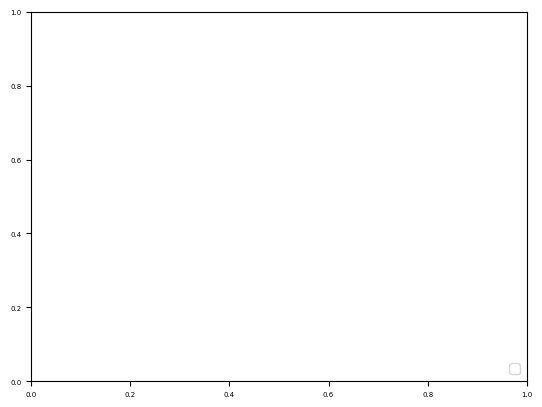

In [24]:
leg_labels = [r'$Non-prompt J/\psi$', r'$Prompt J/\psi$']
plt.rcParams['axes.titlesize'] = 8
plt.rcParams['xtick.labelsize'] = 5
plt.rcParams['ytick.labelsize'] = 5
plt.legend(loc='lower right')

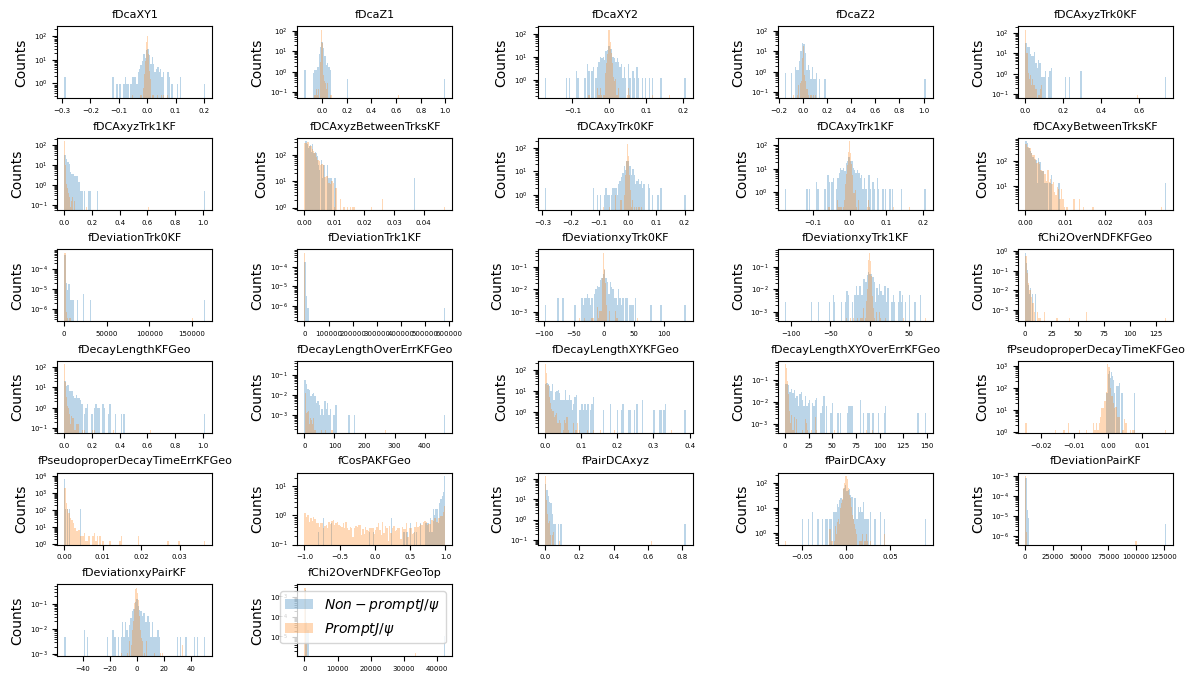

In [27]:
import os
plot_utils.plot_distr([nonpromptH, promptH], vars_to_draw, bins=100, labels=leg_labels, log=True, density=True, figsize=(12, 7), alpha=0.3, grid=False)
plt.subplots_adjust(left=0.06, bottom=0.06, right=0.99, top=0.96, hspace=0.55, wspace=0.55)
os.makedirs("figs", exist_ok=True)
plt.savefig('figs/distribution.pdf')

finish read the data!


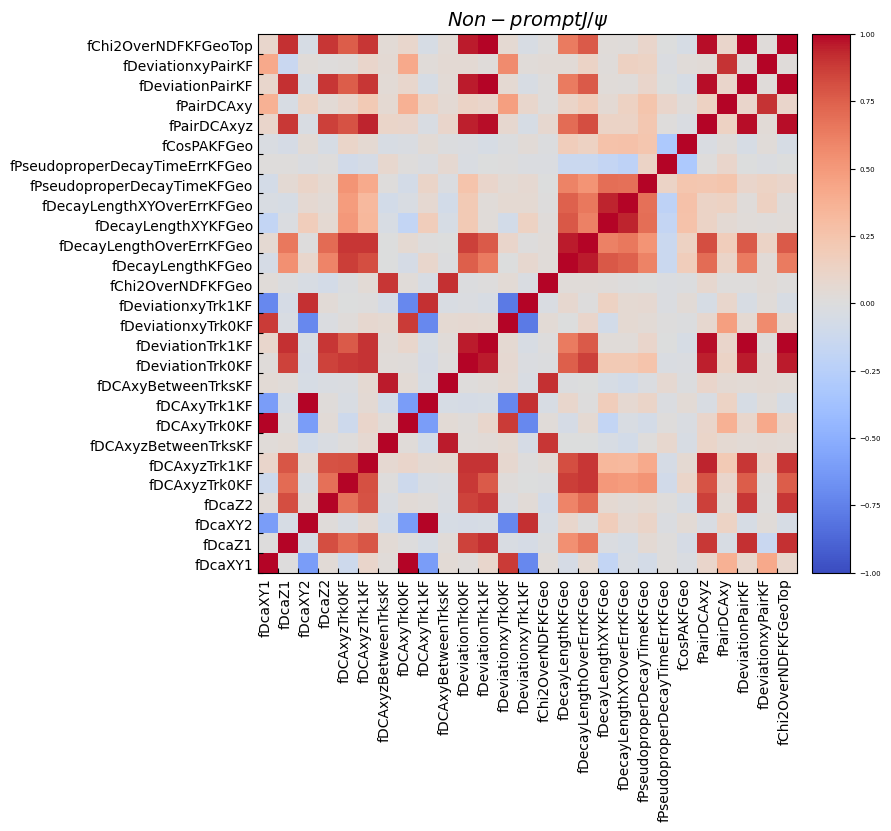

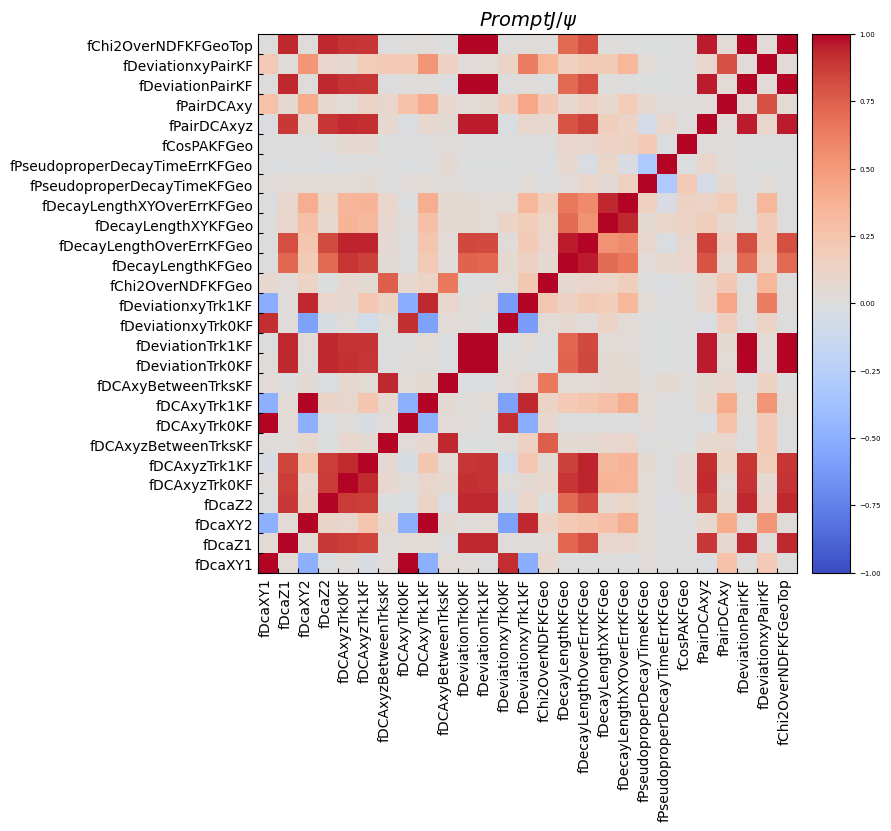

<Figure size 640x480 with 0 Axes>

In [28]:
plot_utils.plot_corr([nonpromptH, promptH], vars_to_draw, leg_labels)
corr1 = plt.figure(2)
corr1.savefig('figs/corr1.pdf')
corr2 = plt.figure(3)
corr1.savefig('figs/corr2.pdf')
print("finish read the data!")

In [29]:
features_for_train = vars_to_draw.copy()
print("features_for_train:", features_for_train)

features_for_train: ['fDcaXY1', 'fDcaZ1', 'fDcaXY2', 'fDcaZ2', 'fDCAxyzTrk0KF', 'fDCAxyzTrk1KF', 'fDCAxyzBetweenTrksKF', 'fDCAxyTrk0KF', 'fDCAxyTrk1KF', 'fDCAxyBetweenTrksKF', 'fDeviationTrk0KF', 'fDeviationTrk1KF', 'fDeviationxyTrk0KF', 'fDeviationxyTrk1KF', 'fChi2OverNDFKFGeo', 'fDecayLengthKFGeo', 'fDecayLengthOverErrKFGeo', 'fDecayLengthXYKFGeo', 'fDecayLengthXYOverErrKFGeo', 'fPseudoproperDecayTimeKFGeo', 'fPseudoproperDecayTimeErrKFGeo', 'fCosPAKFGeo', 'fPairDCAxyz', 'fPairDCAxy', 'fDeviationPairKF', 'fDeviationxyPairKF', 'fChi2OverNDFKFGeoTop']


In [30]:
print("test")
model_clf = xgb.XGBClassifier()
model_hdl = ModelHandler(model_clf, features_for_train)
#  run cross-validation trials and pick the best hyperparameters. "n_jobs=-1" means use all available CPU cores
hyper_pars_ranges = {'n_estimators': (200, 1000), 'max_depth': (
    2, 4), 'learning_rate': (0.01, 0.1)}
# default: model_hdl.optimize_params_optuna(train_test_data, hyper_pars_ranges, cross_val_scoring='roc_auc', timeout=120,
                                # n_jobs=-1, n_trials=100, direction='maximize')
print("Starting parameters optmization with Optuna")
model_hdl.optimize_params_optuna(train_test_data, hyper_pars_ranges, cross_val_scoring='roc_auc', timeout=120,
                                n_jobs=-1, n_trials=3, direction='maximize')
print("Parameters optimization with Optuna finished")
#model_hdl.optimize_params_optuna(train_test_data, hyper_pars_ranges, cross_val_scoring='roc_auc', timeout=5,
#                                n_jobs=1, n_trials=3, direction='maximize')

[I 2025-09-07 16:42:09,639] A new study created in memory with name: no-name-25e3c1fc-492b-47a9-9556-fa1dfe209446


test
Starting parameters optmization with Optuna


/home/ferrandi/alice/Hipe4MLenv/lib/python3.9/site-packages/hipe4ml/model_handler.py:389: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  params[key] = trial.suggest_uniform(
[I 2025-09-07 16:42:25,817] Trial 2 finished with value: 0.9463417681974382 and parameters: {'n_estimators': 257, 'max_depth': 4, 'learning_rate': 0.053258638482925155}. Best is trial 2 with value: 0.9463417681974382.
[I 2025-09-07 16:42:41,500] Trial 0 finished with value: 0.942290676105109 and parameters: {'n_estimators': 954, 'max_depth': 3, 'learning_rate': 0.046097062873743364}. Best is trial 2 with value: 0.9463417681974382.
[I 2025-09-07 16:43:04,415] Trial 1 finished with value: 0.9459058410089337 and parameters: {'n_estimators': 955, 'max_depth': 4, 'learning_rate': 0.016522716258594448}. Best is trial 2 with value: 0.9463417681974382.


Number of finished trials: 3
Best trial:
Value: 0.9463417681974382
Params: 
    n_estimators: 257
    max_depth: 4
    learning_rate: 0.053258638482925155
Parameters optimization with Optuna finished


In [31]:
model_hdl.train_test_model(train_test_data)

Training xgboost model for classification
Number of detected classes: 2
Training the model: ...
Training the model: Done!
Testing the model: ...
ROC_AUC_score: 0.944959
Testing the model: Done!


In [32]:
y_pred_train = model_hdl.predict(train_test_data[0], False)
y_pred_test = model_hdl.predict(train_test_data[2], False)

In [33]:
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams["figure.figsize"] = (20, 15)

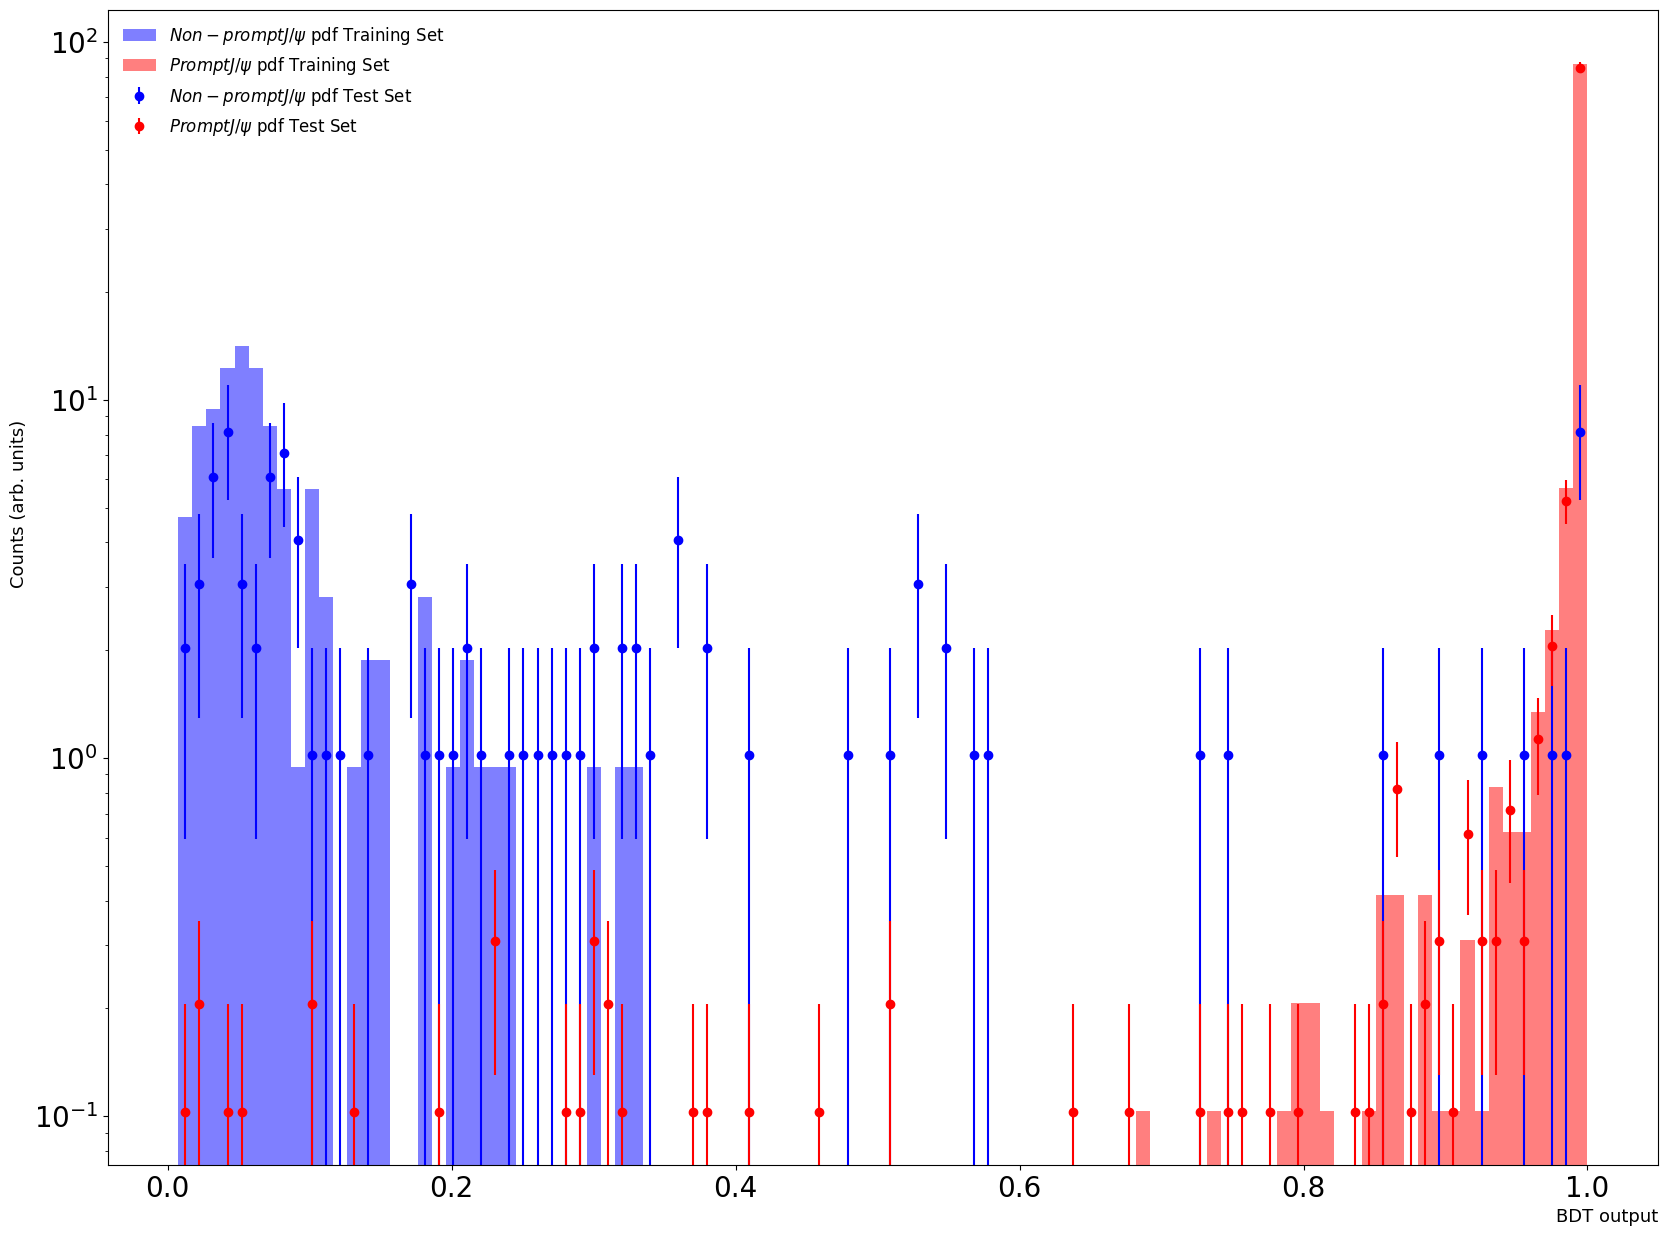

In [34]:
ml_out_fig = plot_utils.plot_output_train_test(model_hdl, train_test_data, 100,
                                               False, leg_labels, True, density=True)
plt.savefig('figs/ml_out_fig.pdf')

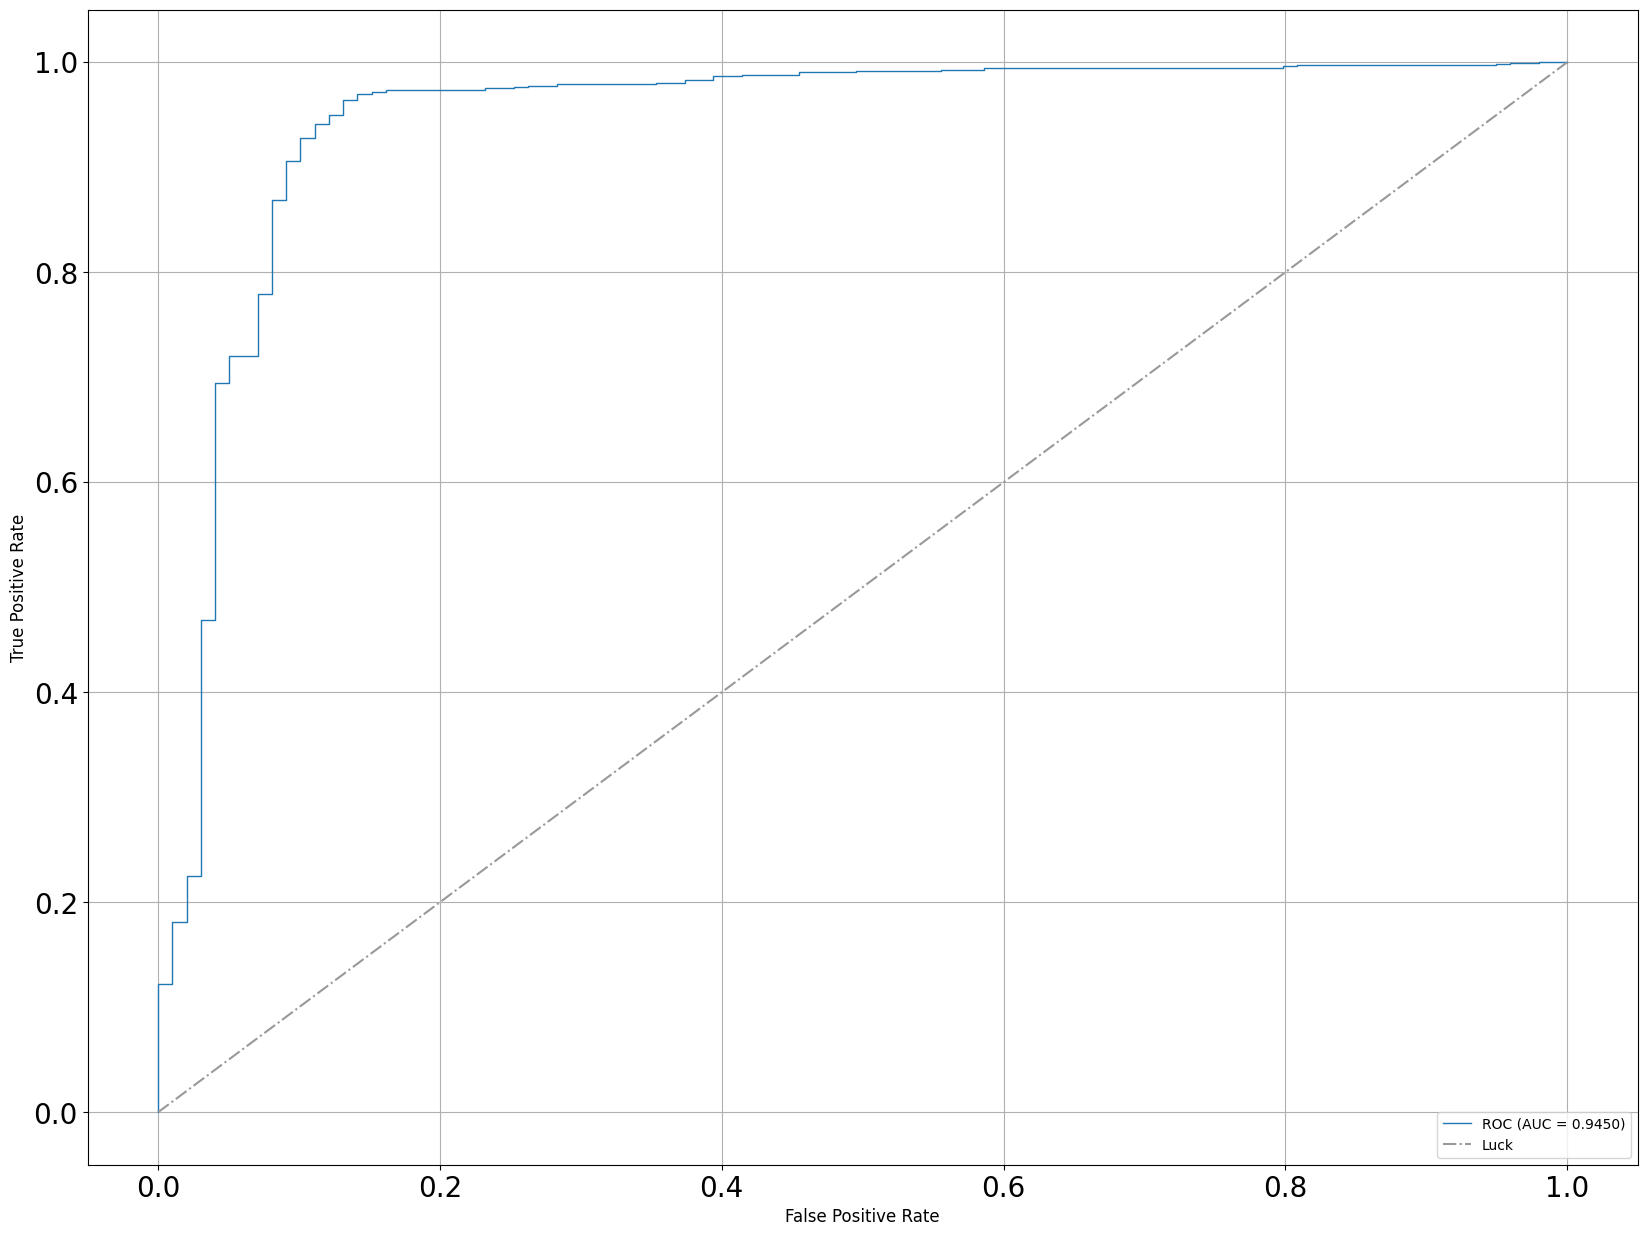

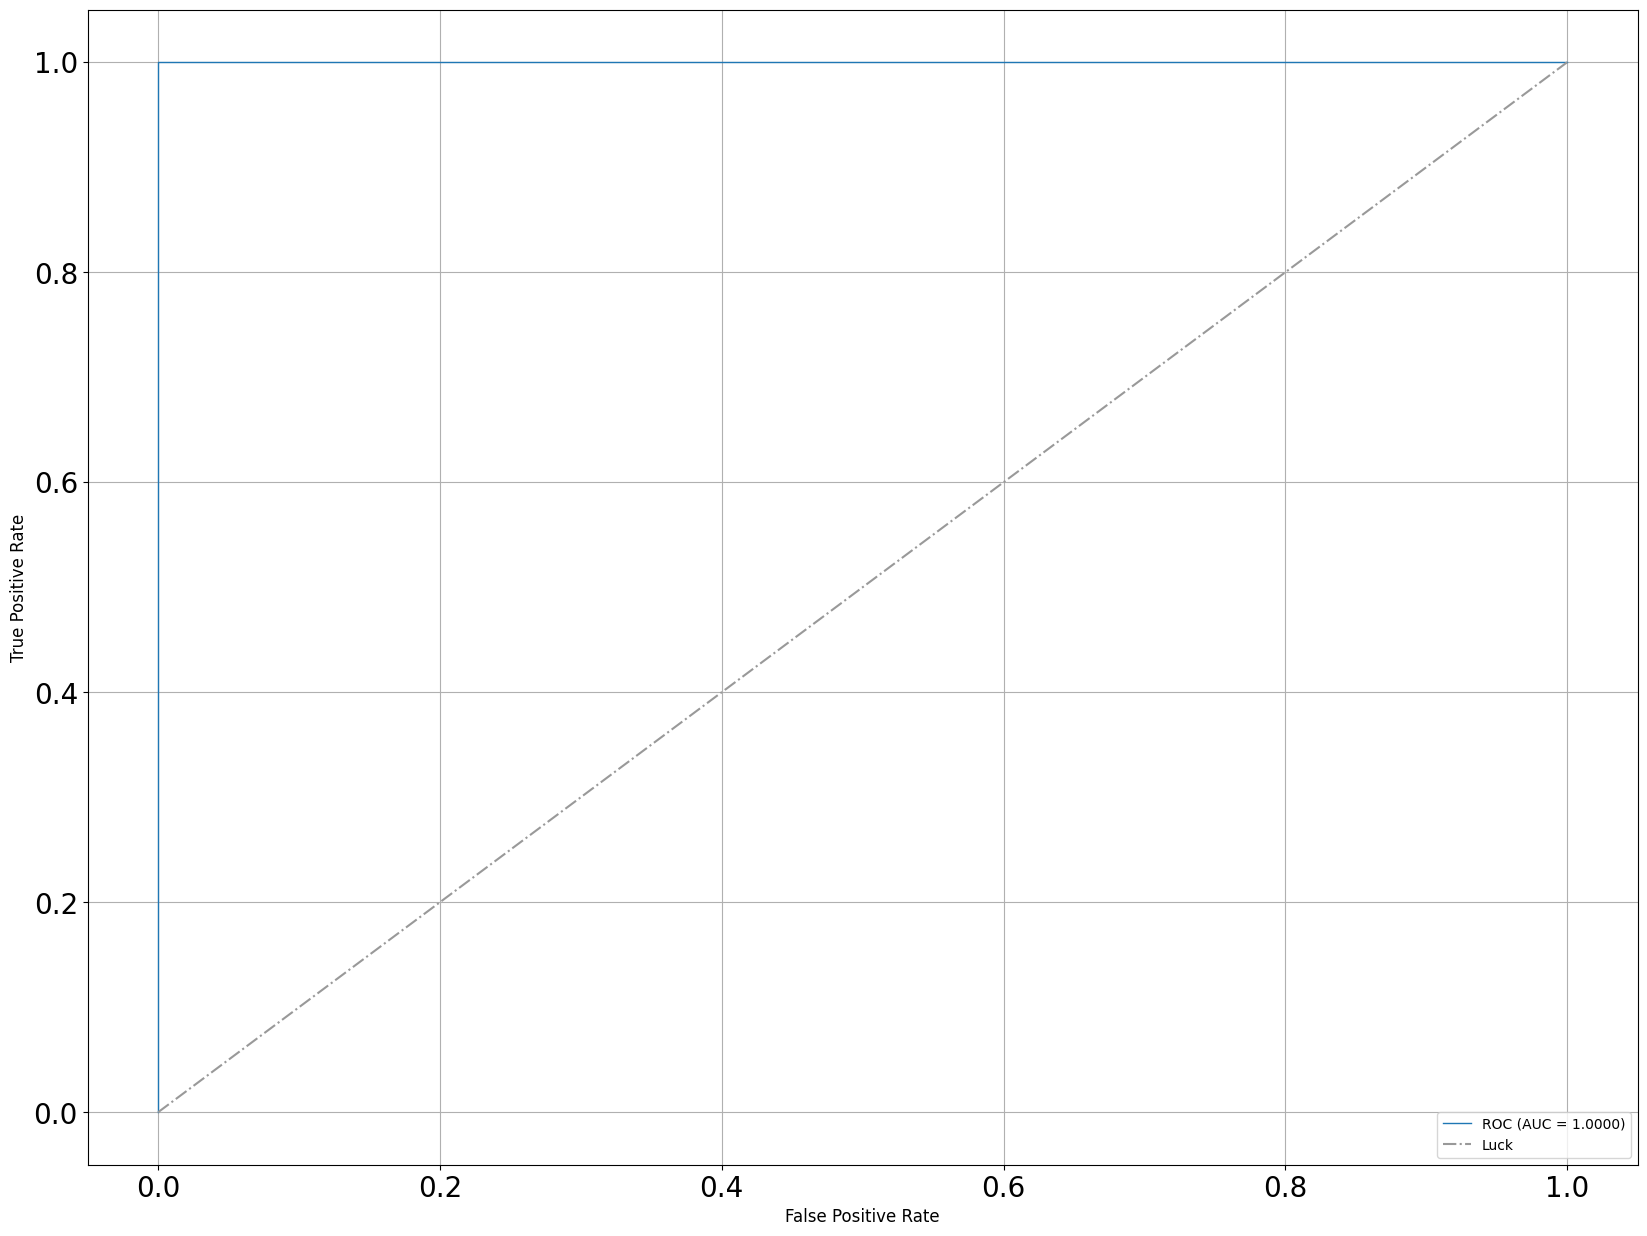

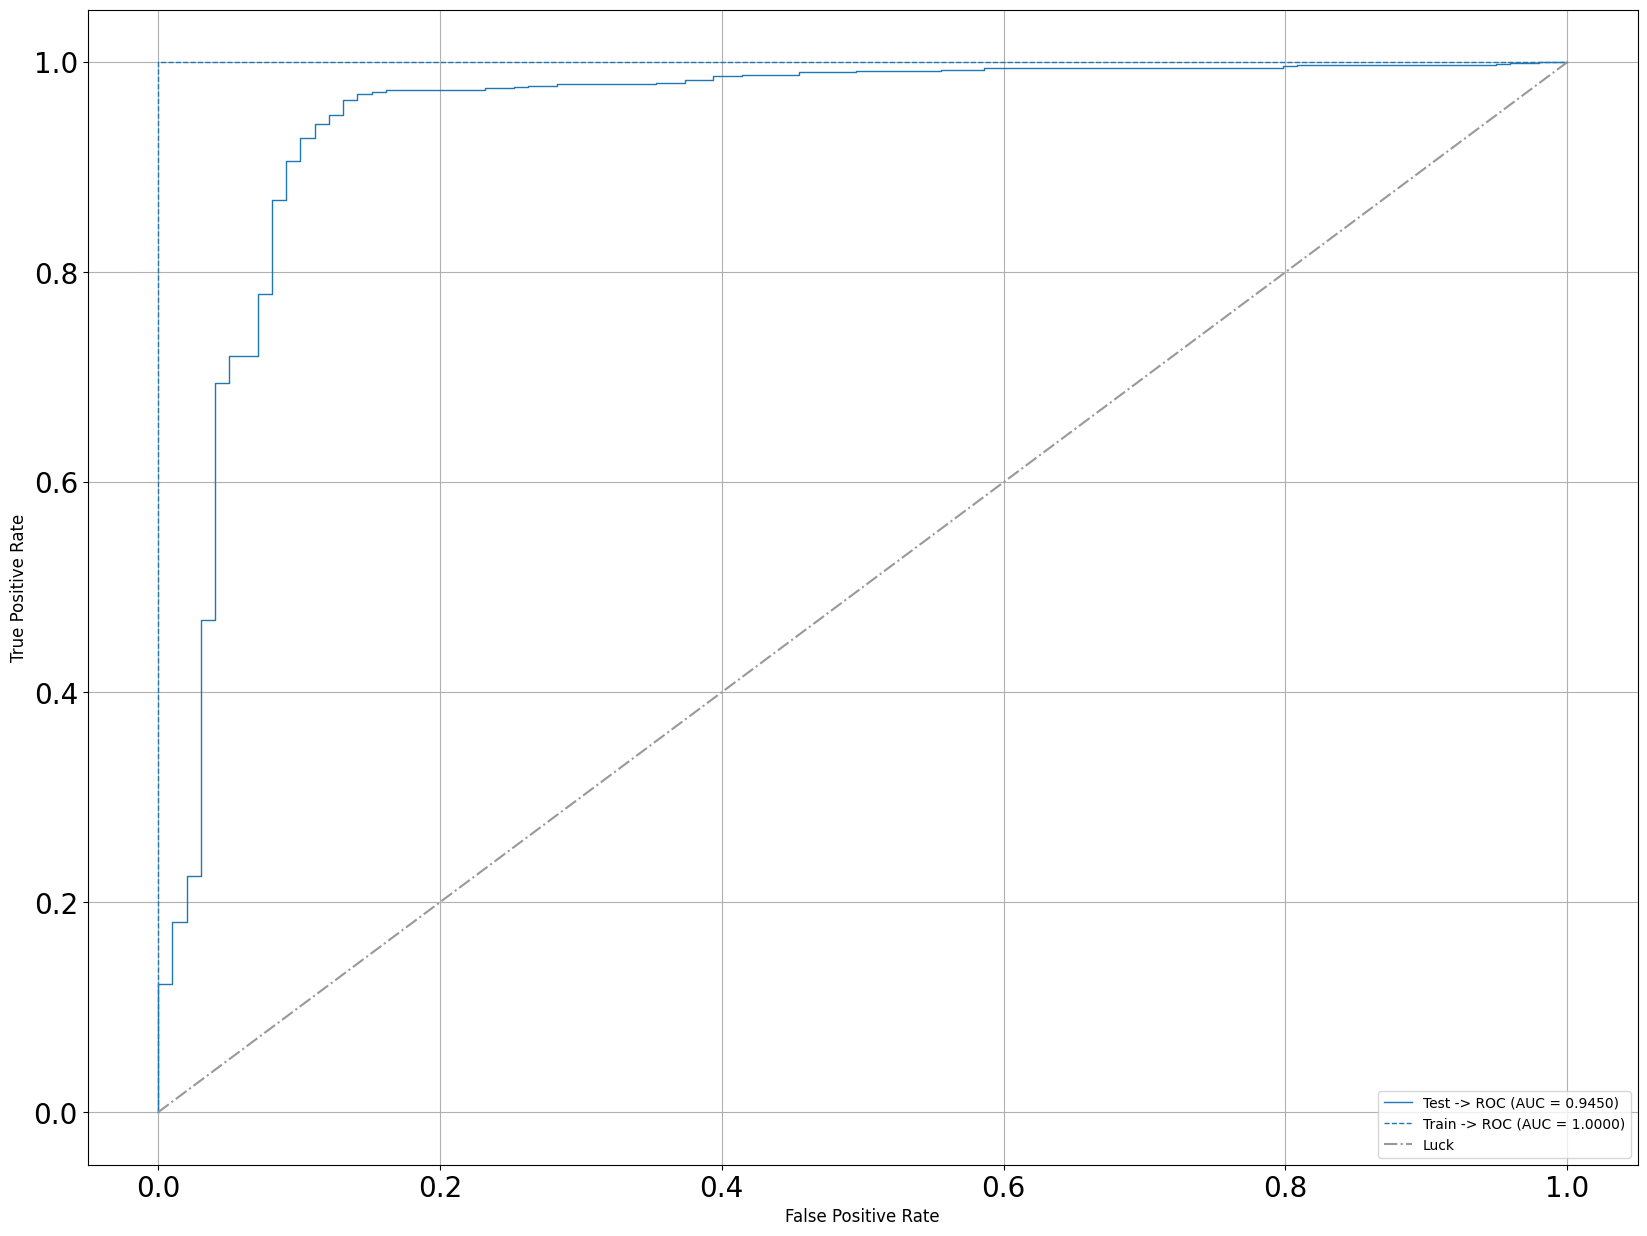

In [35]:
roc_train_test_fig = plot_utils.plot_roc_train_test(train_test_data[3], y_pred_test,
                                                    train_test_data[1], y_pred_train, None, leg_labels)
# plt.savefig('figs/roc.pdf')
roc_train_test_fig.savefig('figs/roc_train_test.pdf')

finish training


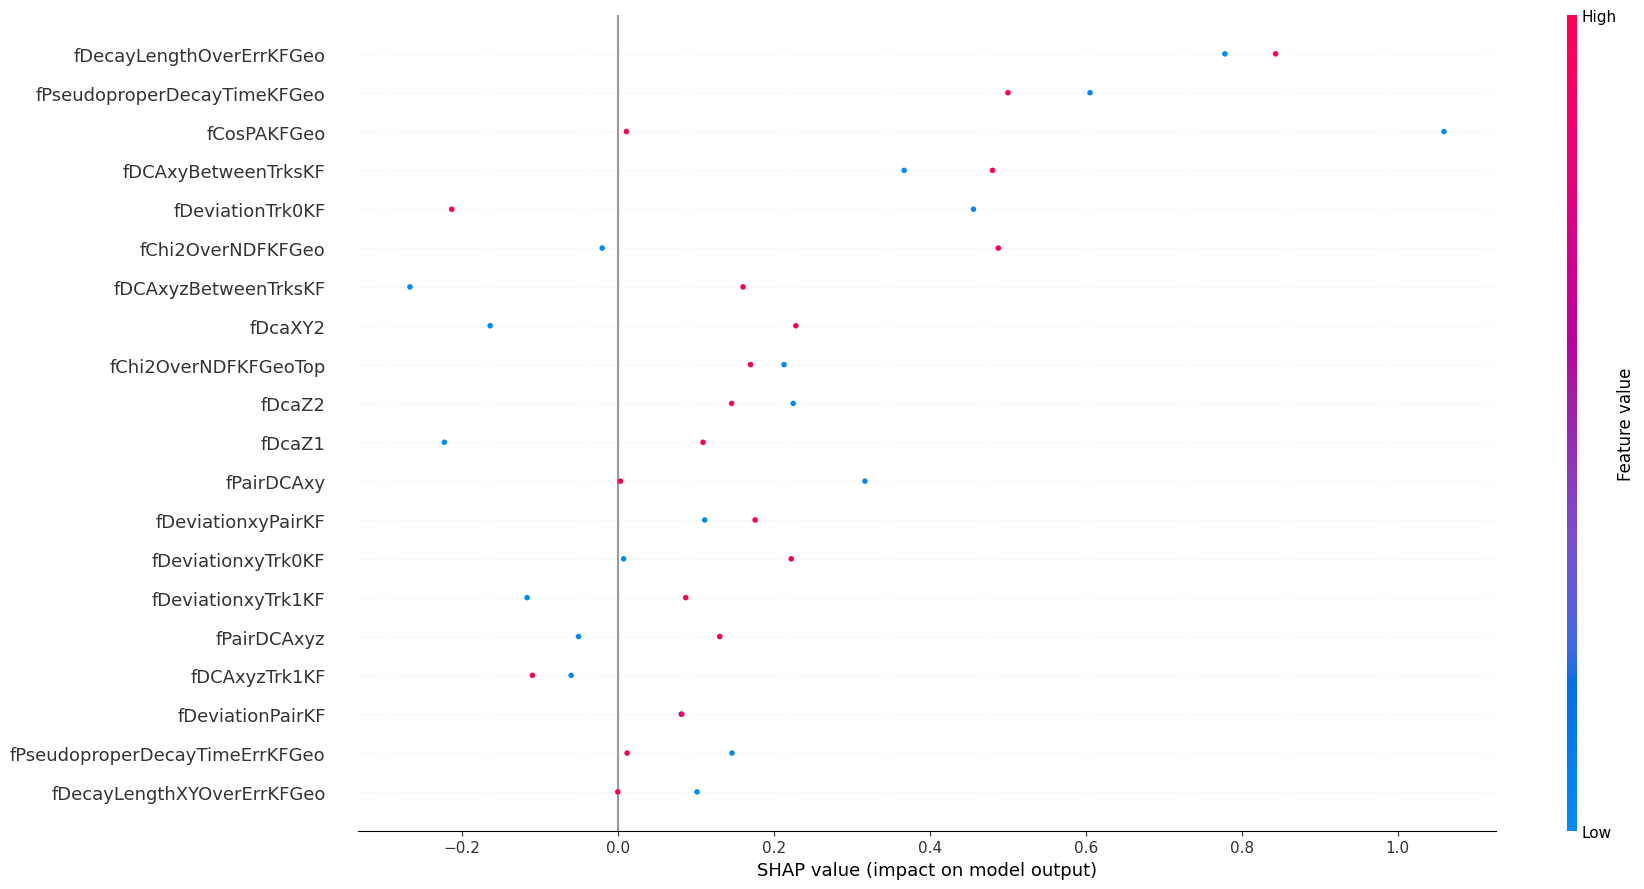

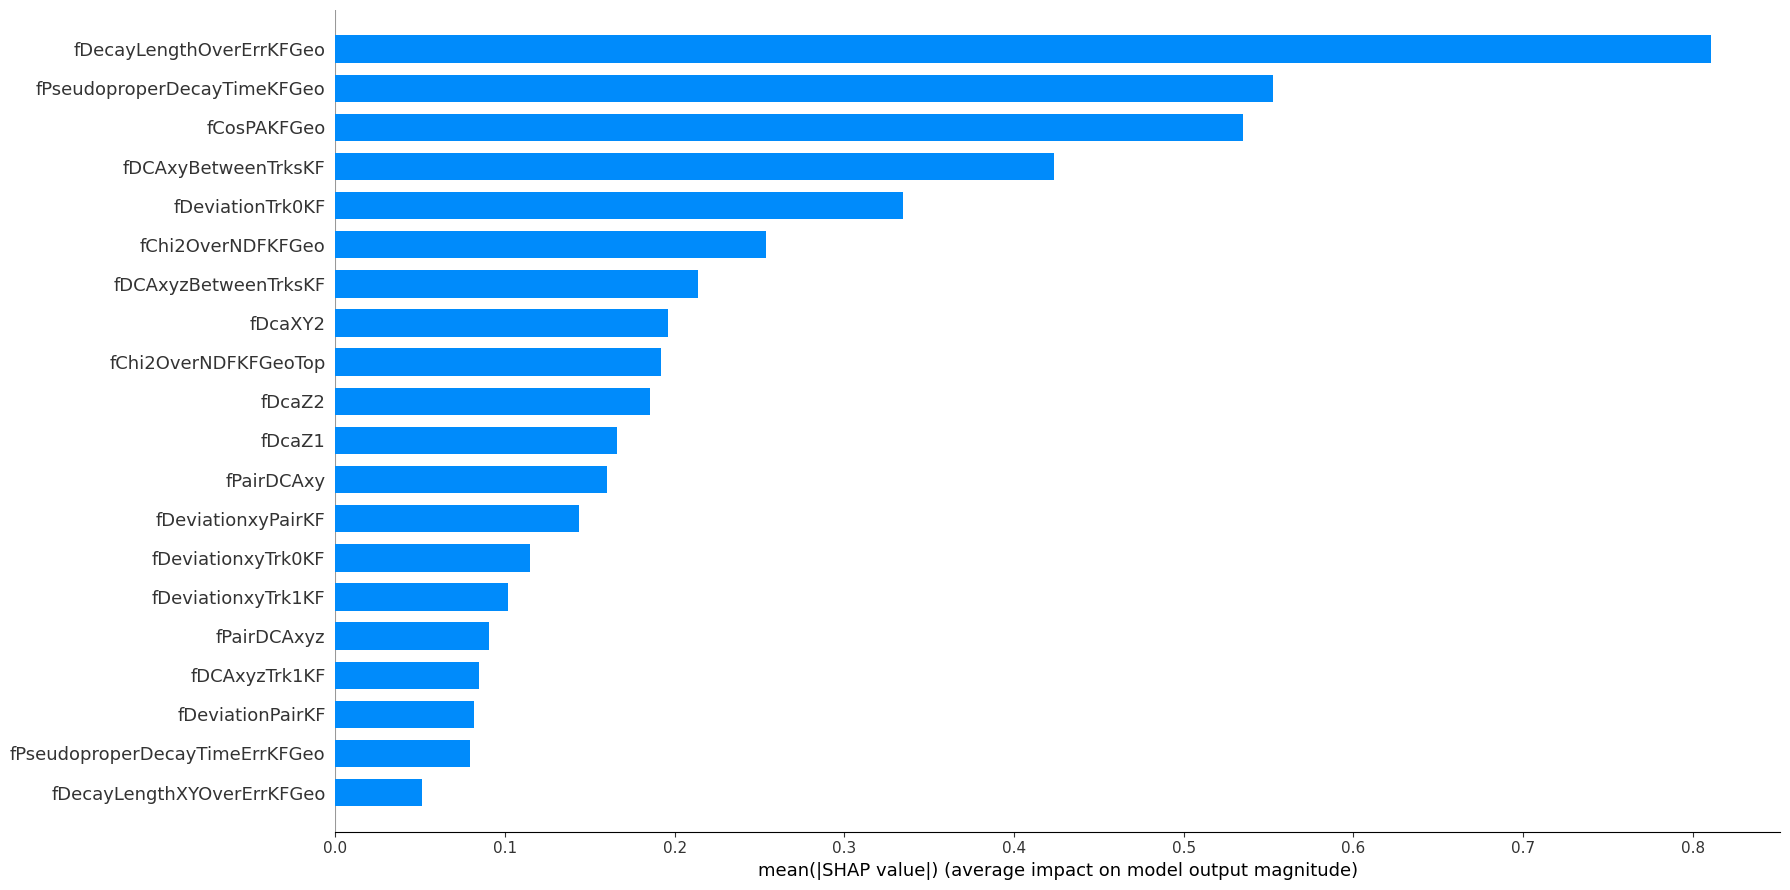

In [36]:
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

features_importance = plot_utils.plot_feature_imp(train_test_data, leg_labels, model_hdl, features_for_train,10000, 1)
plt.savefig("figs/features_importance.pdf")
print("finish training")

In [37]:
for i, fig in enumerate(features_importance):
    fig.savefig(f"figs/features_importance{i}.pdf")

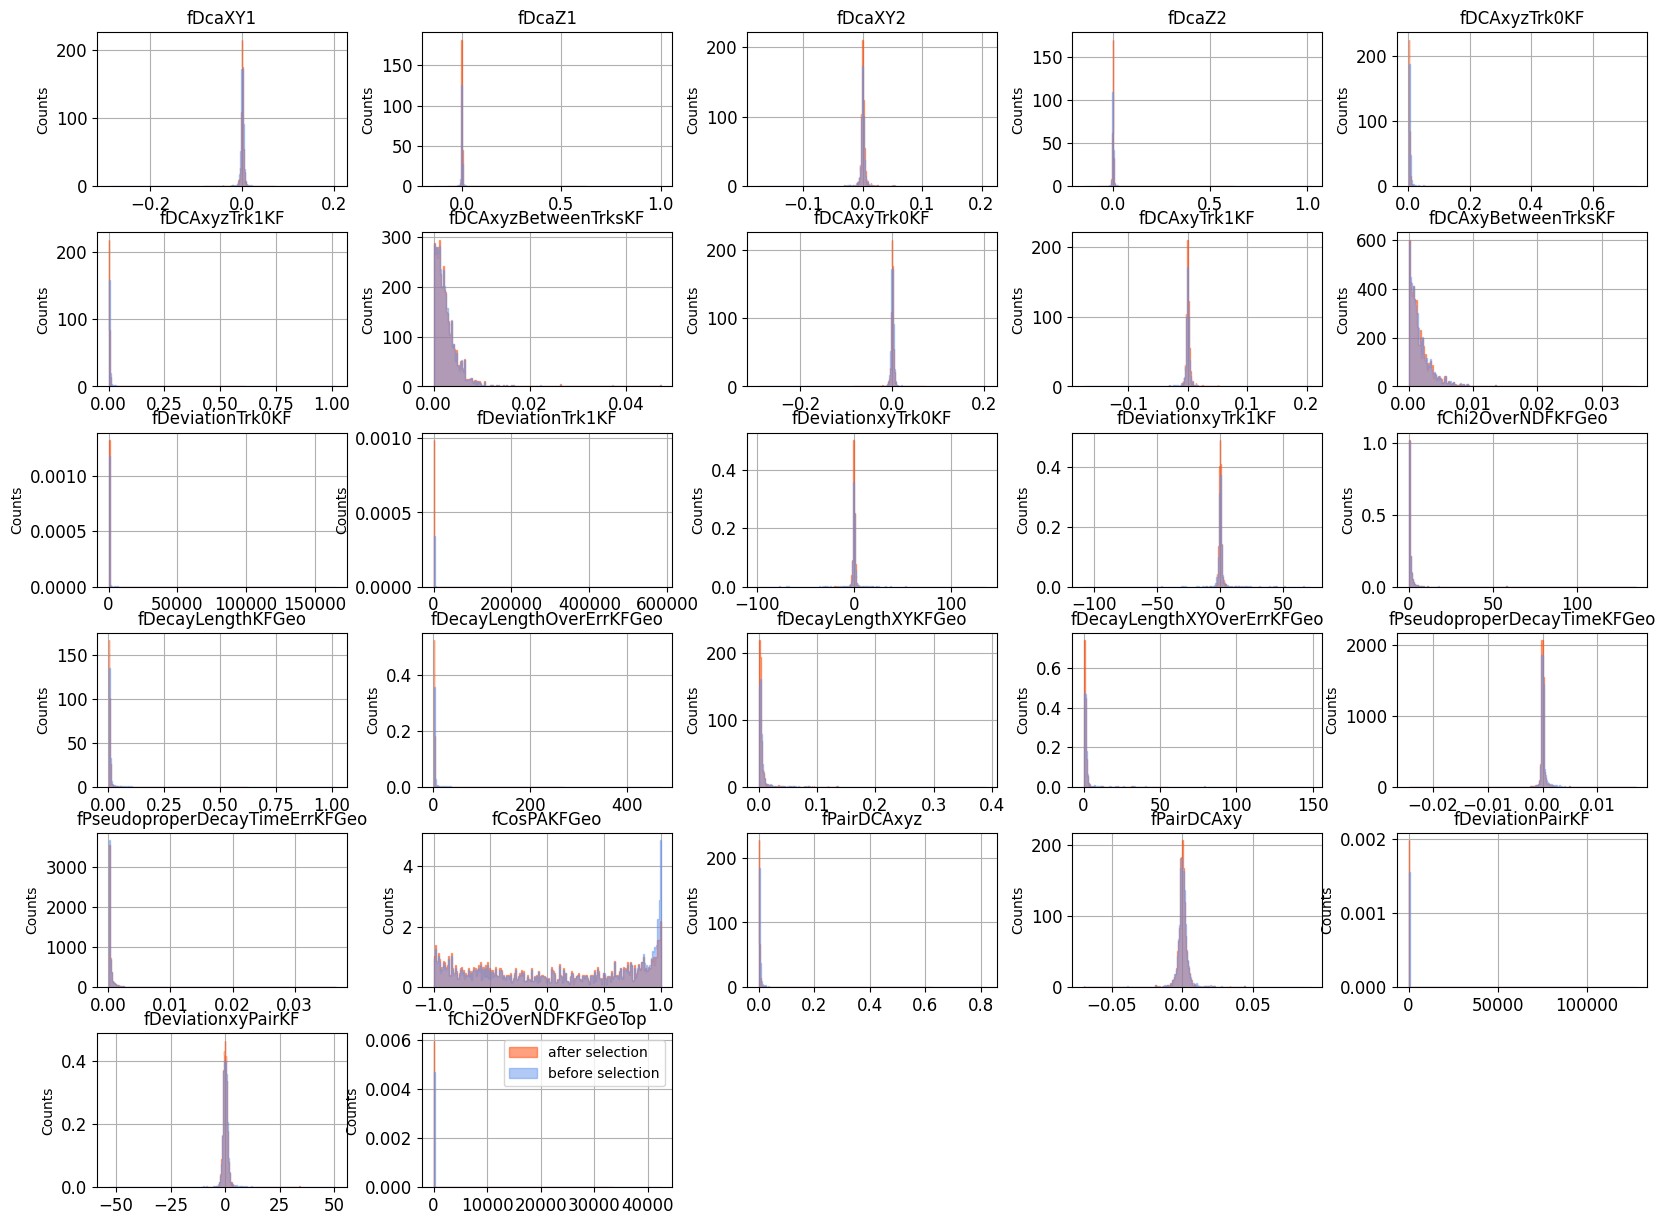

In [38]:
dataH.apply_model_handler(model_hdl, False)

selected_data_hndl = dataH.get_subset('model_output>0.80')
labels_list = ["after selection","before selection"]
colors_list = ['orangered', 'cornflowerblue']
plot_utils.plot_distr([selected_data_hndl, dataH], column=vars_to_draw.copy(), bins=200, labels=labels_list, colors=colors_list, density=True,fill=True, histtype='step', alpha=0.5)
ax = plt.gca()
ax.set_xlabel(r'm(e^{+}e^{-}) (GeV/$c^2$)')
ax.margins(x=0)
ax.xaxis.set_label_coords(0.9, -0.075)
plt.savefig("figs/distributions_data.pdf")

In [39]:
# PRECISION_RECALL_PLOT = plot_utils.plot_precision_recall(DATA[3], Y_PRED)
# BDT_EFFICIENCY_PLOT = plot_utils.plot_bdt_eff(THRESHOLD, EFFICIENCY)

# plt.show()
print("finish training")

finish training
